# Задание 1

## 1)

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt

#словарь
let_num = {
    'а': 1, 'б': 1, 'в': 1, 'г': 1, 'д': 1, 'е': 1,
    'ё': 2, 'ж': 2, 'з': 2, 'и': 2, 'й': 2, 'к': 2,
    'л': 3, 'м': 3, 'н': 3, 'о': 3, 'п': 3, 'р': 3,
    'с': 4, 'т': 4, 'у': 4, 'ф': 4, 'х': 4, 'ц': 4,
    'ч': 5, 'ш': 5, 'щ': 5, 'ъ': 5, 'ы': 5, 'ь': 5,
    'э': 6, 'ю': 6, 'я': 6,
    'А': 1, 'Б': 1, 'В': 1, 'Г': 1, 'Д': 1, 'Е': 1,
    'Ё': 2, 'Ж': 2, 'З': 2, 'И': 2, 'Й': 2, 'К': 2,
    'Л': 3, 'М': 3, 'Н': 3, 'О': 3, 'П': 3, 'Р': 3,
    'С': 4, 'Т': 4, 'У': 4, 'Ф': 4, 'Х': 4, 'Ц': 4,
    'Ч': 5, 'Ш': 5, 'Щ': 5, 'Ъ': 5, 'Ы': 5, 'Ь': 5,
    'Э': 6, 'Ю': 6, 'Я': 6}

name = 'Иван'
middle_name = 'Иванович'
surname = 'Иванов'

all_let = list(name+middle_name+surname) #список букв
num = [let_num[letter] for letter in all_let] #список цифр, соответствующих буквам
M_x = np.mean(num) #мат.ожидание
D_x = np.var(num) #дисперсия
print('Буквы:',all_let)
print('Цифры:',num)
print('Мат.ожидание',M_x)
print('Дисперсия',D_x)

Буквы: ['И', 'в', 'а', 'н', 'И', 'в', 'а', 'н', 'о', 'в', 'и', 'ч', 'И', 'в', 'а', 'н', 'о', 'в']
Цифры: [2, 1, 1, 3, 2, 1, 1, 3, 3, 1, 2, 5, 2, 1, 1, 3, 3, 1]
Мат.ожидание 2.0
Дисперсия 1.2222222222222223


Выборка: [1, 1, 3, 5, 2, 2, 1, 3, 1, 1, 3, 3, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 2, 2, 5, 2, 1, 3, 5, 1, 1, 3, 2, 1, 2, 3, 1, 3, 3, 3, 2, 2, 1, 3, 1, 1]


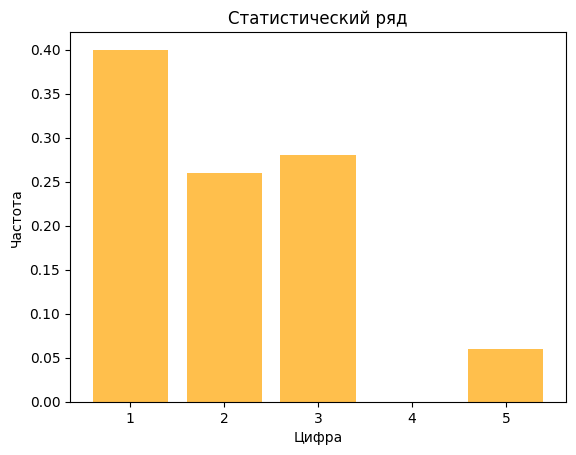

In [27]:
sam_size = 50
sam = random.choices(num,k=sam_size)
print("Выборка:",sam)

uniq_val, c = np.unique(sam,return_counts=True) #статистический ряд
stat_series = dict(zip(uniq_val,c/sam_size))

#визуализация
plt.bar(stat_series.keys(),stat_series.values(),color='orange',alpha=0.7)
plt.xlabel('Цифра')
plt.ylabel('Частота')
plt.title('Статистический ряд')
plt.show()

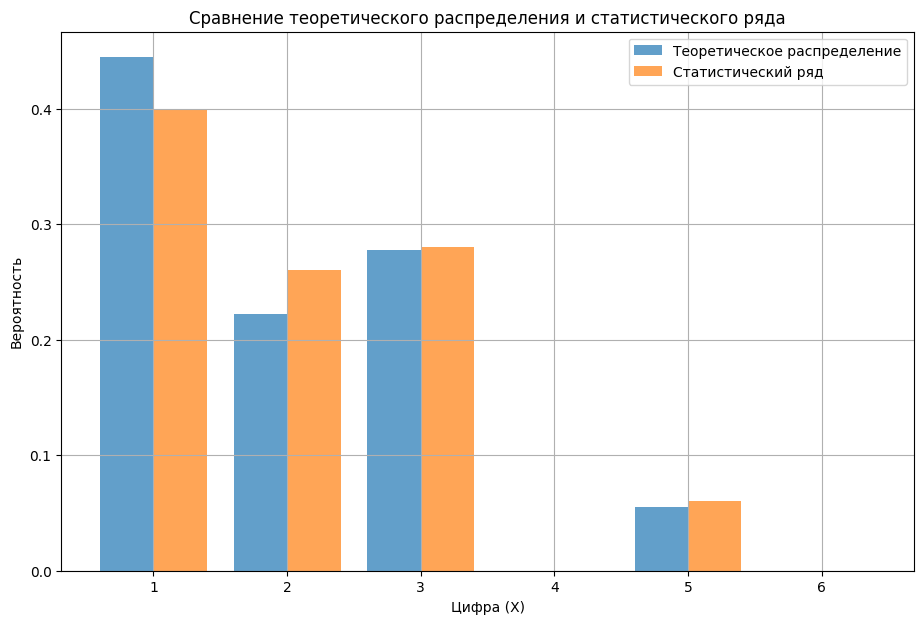

Теоретический ряд распределения:
P(X=1) = 0.4444
P(X=2) = 0.2222
P(X=3) = 0.2778
P(X=5) = 0.0556

Статистический ряд распределения:
P(X=1) = 0.4000
P(X=2) = 0.2600
P(X=3) = 0.2800
P(X=5) = 0.0600


In [28]:
#теоретическое распределение
total_let = len(num)
theor = {key: num.count(key)/total_let for key in set(num)}

digits_range = range(1,7)
theor_probs = [theor.get(digit,0) for digit in digits_range]
sam_probs = [stat_series.get(digit,0) for digit in digits_range]

plt.figure(figsize=(11,7))
plt.bar([x - 0.2 for x in digits_range],theor_probs,width=0.4,label="Теоретическое распределение",alpha=0.7)
plt.bar([x + 0.2 for x in digits_range],sam_probs,width=0.4,label="Статистический ряд",alpha=0.7)
plt.xticks(digits_range)
plt.xlabel("Цифра (X)")
plt.ylabel("Вероятность")
plt.title("Сравнение теоретического распределения и статистического ряда")
plt.legend()
plt.grid(True)
plt.show()

# Вывод результатов
print("Теоретический ряд распределения:")
for digit,prob in sorted(theor.items()):
    print(f"P(X={digit}) = {prob:.4f}")

print("\nСтатистический ряд распределения:")
for digit,prob in sorted(stat_series.items()):
    print(f"P(X={digit}) = {prob:.4f}")

## 2)

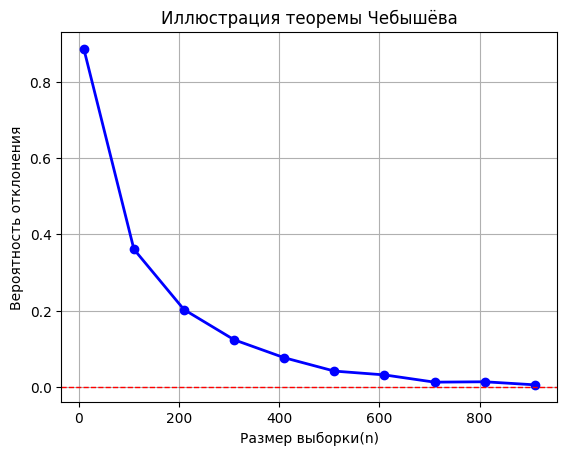

In [29]:
eps = 0.1 #отклонение
n_values = range(10,1000,100) #размеры выборок 
num_exper = 1000 #количество экспериментов

#функция для вычисления вероятности отклонения
def calc(n,eps,num_exper):
    dev = 0
    for _ in range(num_exper):
        sam = random.choices(num,k=n)  
        sam_mean = np.mean(sam)    
        if abs(sam_mean-M_x) >= eps:
            dev += 1
    return dev/num_exper

pr = [calc(n,eps,num_exper) for n in n_values] #вероятности для разных n

plt.plot(n_values,pr,color='blue',marker='o',linestyle='-',linewidth=2)
plt.axhline(0,color='red',linestyle='dashed',linewidth=1)
plt.xlabel('Размер выборки(n)')
plt.ylabel('Вероятность отклонения')
plt.title('Иллюстрация теоремы Чебышёва')
plt.grid(True)
plt.show()

## Задание 2


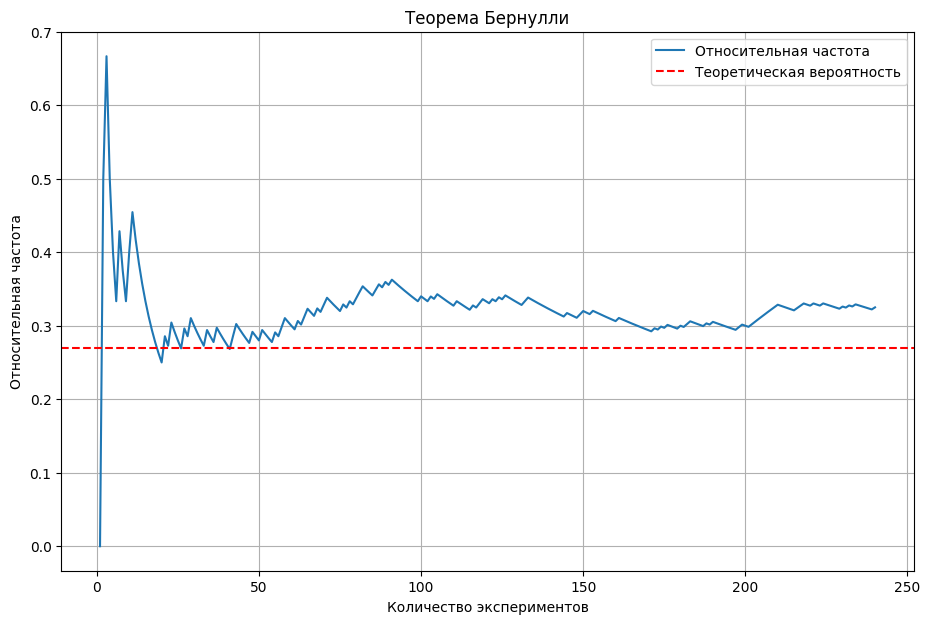

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#возвращает массив, где каждый элемент - это количество успешных событий A в каждом эксперименте
def pod(n_exper):
    success_c = []
    for _ in range(n_exper):
        d = np.random.randint(1,7,size=7)
        c1 = np.bincount(d,minlength=7) #подсчет количества
        c = c1[1:]
        if np.sum(c==2)==2 and np.sum(c==1)==3: #событие А
            success_c.append(1)
        else:
            success_c.append(0)
    return np.array(success_c)

n = 240
success_c = pod(n)
rel = np.cumsum(success_c)/np.arange(1,n+1)
P_A = 0.27

plt.figure(figsize=(11,7))
plt.plot(np.arange(1,n + 1),rel,label='Относительная частота')
plt.axhline(y=P_A,color='r',linestyle='--',label='Теоретическая вероятность')
plt.xlabel('Количество экспериментов')
plt.ylabel('Относительная частота')
plt.title('Теорема Бернулли')
plt.legend()
plt.grid(True)
plt.show()